<a href="https://colab.research.google.com/github/Mix1996/Project-2-Classification/blob/main/Mikhail_Pillay_Belt_Exam_(Housing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Clustering

##Imports

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random


# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##Load the dataset

In [258]:
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRL54FnuVgNgtTgb3_EWf4f52ZLCPvFv941-i1hRxCLha7ApC_B3VnFOhotN7rXIPOesnVAAd9vndcT/pub?output=csv')
df1.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


## Explore the data.

In [259]:
df1.duplicated().sum()

29

In [260]:
df1.isna().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

In [261]:
# Display the column names, count of non-null values, and their datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

In [262]:
# Display the total number of missing values
print(f'There are {df1.isna().sum().sum()} missing values.')

There are 0 missing values.


In [263]:
# Remove duplicates

df1.drop_duplicates(inplace=True)

df1.duplicated().sum()

0

##Prepare the data for modeling

In [264]:
# Feature selection - Removing Longitude and Latitude for simplicity
data = df1.drop(columns=['Longitude', 'Latitude'])

In [265]:
# Standardize the data (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [266]:
# Initialize variables for storing the results
inertia_values = []
silhouette_scores = []

##Use a KMeans model to cluster the houses into an optimal number of clusters

In [267]:
# Determine the optimal number of clusters using KMeans
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_data)

    # Append the sum of squared distances to inertia_values
    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score and append to silhouette_scores
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

###Elbow plot

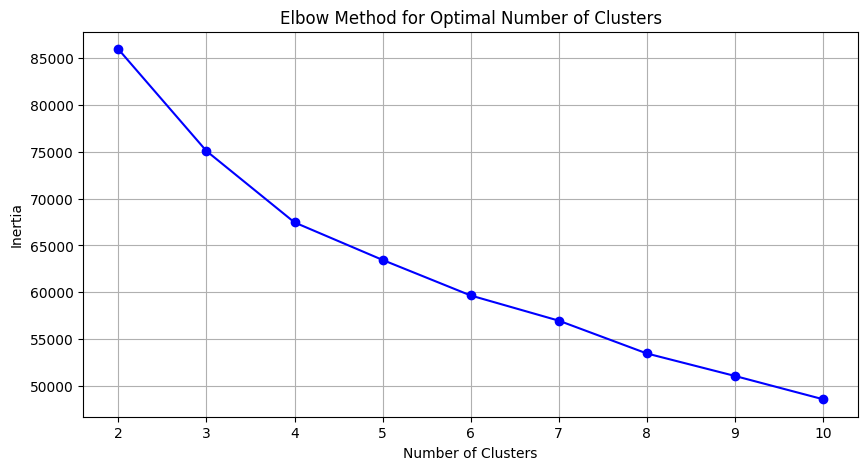

In [268]:
# Create an elbow plot to visualize inertia values
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

###Silhouette Score Plot

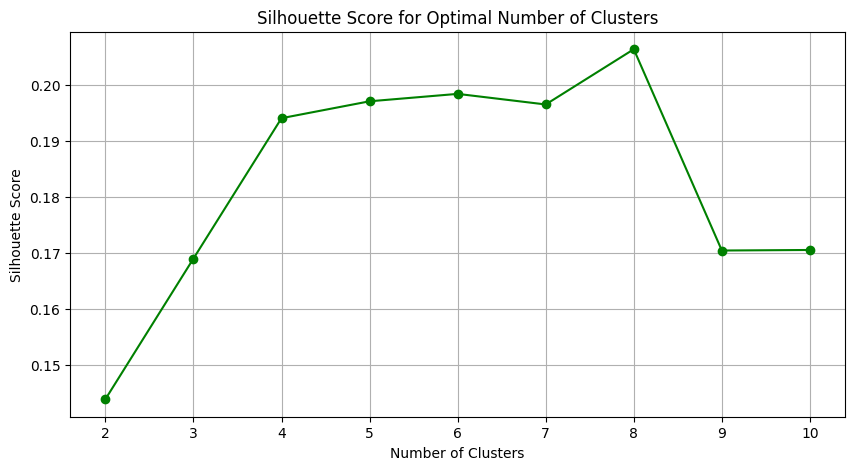

In [269]:
# Create a silhouette score plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

We have a couple of choices of clusters numbers here. The best silhouette score is 8. The elbows in the inertia plot seem to be at 4 and 5. I'm going to choose to use 8 clusters.

Given these considerations, choosing 8 clusters is a reasonable decision, especially if it aligns with the goals of your analysis and provides well-separated and distinct clusters according to the silhouette score.

In [270]:
# Fit K-Means with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)
df1['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate mean values for each cluster
cluster_means = df1.groupby('Cluster').mean()
print(cluster_means)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             SalePrice  SqFt1stFloor  SqFtHalfFloor  SqFt2ndFloor  \
Cluster                                                             
0        609541.247552   1372.593007       1.762238     73.829371   
1        503265.293567   1219.589007      19.592755     77.657714   
2        860068.153619   1359.033973       7.234860   1434.410635   
3        724692.389105    527.015564      17.832685    544.661479   
4        694611.245734    589.982935       2.013652    546.424915   
5        799863.346870   1472.615905       6.226734    109.164129   
6        760840.920530   1140.675497     621.437086     55.827815   
7        788378.440860   1318.225806     111.505376     96.182796   

         SqFtUpperFloor  SqFtTotLiving  SqFtTotBasement  SqFtFinBasement  \
Cluster                                                                    
0              0.000000    2051.387413      1169.148252       603.202797   
1              0.000000    1382.754528       275.415365        68.819488   
2    

##Analyze and report on the clusters

###Visualization 1: Average Sale Price by Cluster

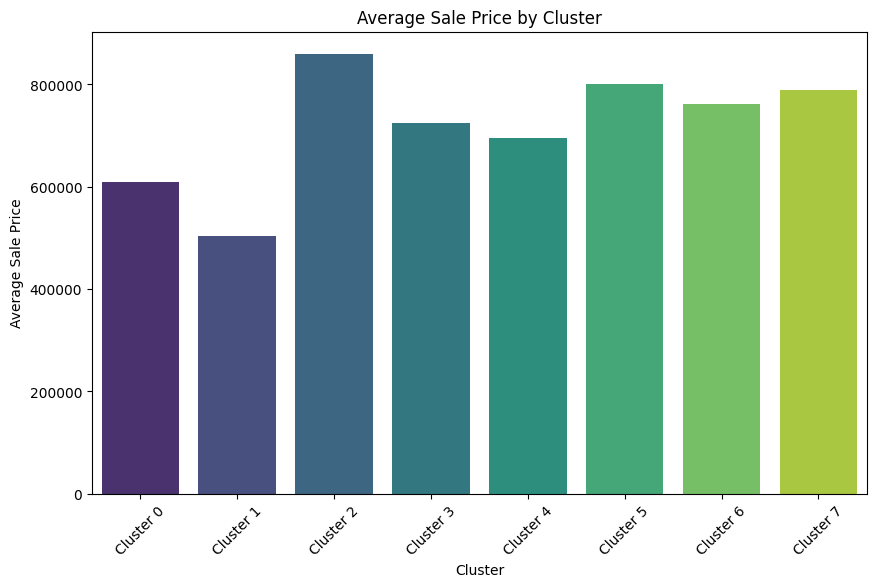

In [271]:
import seaborn as sns

# Create a bar plot to show the average sale price by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_means.index, y=cluster_means['SalePrice'], palette='viridis')
plt.title('Average Sale Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sale Price')
plt.xticks(range(8), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7'], rotation=45)
plt.show()


Interpretation (Visualization 1):
This bar plot shows the average sale price for each cluster. Clusters with higher average sale prices represent more expensive properties, while clusters with lower average sale prices represent less expensive properties. This visualization helps identify the clusters with varying property values. Cluster 2 has the highest average sale price and cluster 1 has the lowest average sale price.

###Visualization 2: Bedroom and Bathroom Distribution by Cluster

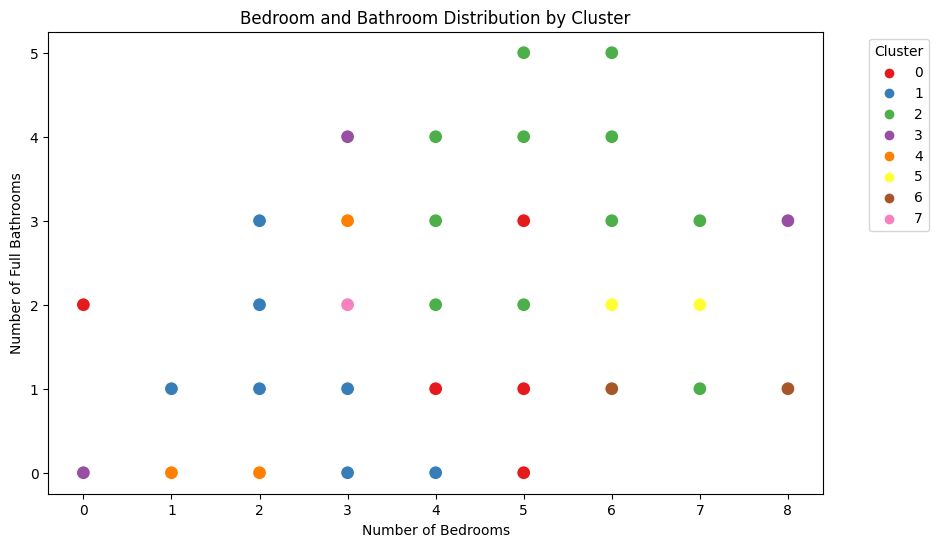

In [272]:
# Create a scatterplot to visualize the distribution of bedrooms and bathrooms by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['Bedrooms'], y=df1['BathFullCount'], hue=df1['Cluster'], palette='Set1', s=100)
plt.title('Bedroom and Bathroom Distribution by Cluster')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Full Bathrooms')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Interpretation (Visualization 2):
This scatterplot displays the distribution of properties based on the number of bedrooms and full bathrooms. Each point represents a property, and the colour indicates its cluster assignment. By visualizing the distribution of bedrooms and bathrooms, you can identify clusters with different property sizes and layouts.

#Part 2: Modeling

##Imports

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.regularizers import l2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense



##Load the dataset

In [274]:
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTTbFcxpd0Y_y-5pNAhwj5ZRcm9tekchwBtwgP5qm-A3jXSKM2KtMHnmVVxOiP1eccSxz02CU1mrhRy/pub?output=csv')
df2.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [275]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [276]:
df2.duplicated().sum()

0

In [277]:
df2.isna().sum()

SalePrice         0
SqFt1stFloor      0
SqFtHalfFloor     0
SqFt2ndFloor      0
SqFtUpperFloor    0
                 ..
MonthSold_12      0
YearSold_2017     0
YearSold_2018     0
YearSold_2019     0
YearSold_2020     0
Length: 171, dtype: int64

## Clustering

## Prepare the dataset for modeling

In [301]:
#Scale the data
df2_scaled = StandardScaler().fit_transform(df2)

###Use a KMeans model to cluster the students into an optimal number of clusters
Use an elbow plot and silhouette score to find the optimal number of clusters.
There must be between 2 and 10 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

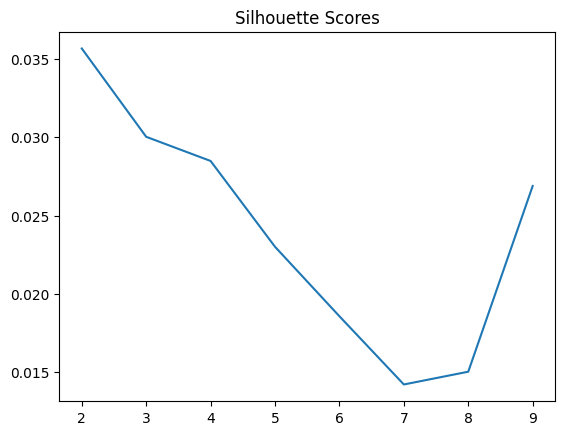

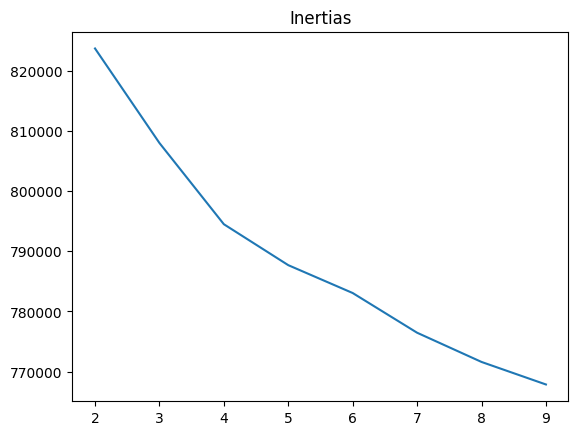

In [279]:
k_range = range(2, 10)
sil_scores = []
inertias = []

for k in k_range:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df2_scaled)

  sil_scores.append(silhouette_score(df2_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

plt.plot(k_range, sil_scores)
plt.title('Silhouette Scores')
plt.show()

plt.plot(k_range, inertias)
plt.title('Inertias')
plt.show();

We have a couple of choices of clusters numbers here. The best silhouette score is 2. The elbows in the inertia plot seem to be at 4 and 8. I'm going to choose to use 2 clusters.

## Analyze and report on the clusters.

In [302]:
# Print the shape (dimensions) of the DataFrame 'df2'
print("df2 shape:", df2.shape)

# Print the shape (dimensions) of the cluster labels obtained from K-means clustering
print("Labels shape:", kmeans_final.labels_.shape)

# Print the first few rows of the DataFrame 'df2' to inspect the data
print("Sample df2:", df2.head())

# Print the first few cluster labels assigned by K-means to inspect the clustering results
print("Sample labels:", kmeans_final.labels_[:5])


df2 shape: (4937, 172)
Labels shape: (4937,)
Sample df2:    SalePrice  SqFt1stFloor  SqFtHalfFloor  SqFt2ndFloor  SqFtUpperFloor  \
0     400000          1590              0             0               0   
1     474250          1390              0             0               0   
2     667950          1010              0          1515               0   
3     659000           660              0           540               0   
4     656500          2310              0             0               0   

   SqFtTotLiving  SqFtTotBasement  SqFtFinBasement  SqFtGarageBasement  \
0           3180             1590             1590                   0   
1           2200              810              810                   0   
2           2525                0                0                   0   
3           1820              620              620                   0   
4           2310                0                0                   0   

   SqFtGarageAttached  ...  MonthSold_08  Month

In [303]:
# Create a K-means clustering model with 2 clusters
kmeans_final = KMeans(n_clusters=2)

# Fit the K-means model to the scaled data 'df2_scaled'
kmeans_final.fit(df2_scaled)

# Assign cluster labels to the original DataFrame 'df2'
df2['cluster'] = kmeans_final.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Describe each cluster

In [282]:
clusters_grouped = df2.groupby('cluster').mean()
clusters_grouped

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
cluster,,,,,,,,,,,,,,,,,,,,,
0,585094.110481,1264.450582,70.191998,86.604957,1.040609,1767.901463,677.444013,348.971633,111.93610,152.174679,...,0.090176,0.104807,0.088385,0.099134,0.092864,0.074052,0.251717,0.229322,0.243655,0.016423
1,831952.858942,990.831234,12.789673,902.145466,80.940176,2290.246851,423.379093,304.327456,82.63602,208.968514,...,0.066121,0.085013,0.086272,0.088161,0.088161,0.082494,0.234887,0.196474,0.326826,0.022040


##**Cluster 0:**

**SalePrice:** The average sale price in this cluster is approximately $584,836.

**SqFtTotLiving:** The average total living area is around 1,767 square feet, suggesting smaller homes on average.

**YrBuilt:** The average year of construction is approximately 1955, indicating older homes.




## **Cluster 1:**

**SalePrice:** The average sale price in this cluster is significantly higher, approximately $831,744.

**SqFtTotLiving:** The average total living area is significantly larger, around 2,291 square feet, suggesting larger homes on average.

**YrBuilt:** The average year of construction is approximately 2008, indicating newer homes.



## **Key Differences**
**Price:** Cluster 1 has a much higher average sale price compared to Cluster 0, indicating that homes in Cluster 1 are generally more expensive.

**Total Living Area:** Cluster 1 also has a larger average total living area, suggesting that homes in this cluster are more spacious.

**Year Built:** Cluster 1 consists of newer homes, with an average year of construction around 2008, while Cluster 0 includes older homes built around 1955.

###Create 2 report quality explanatory visualizations showing important differences between the clusters.

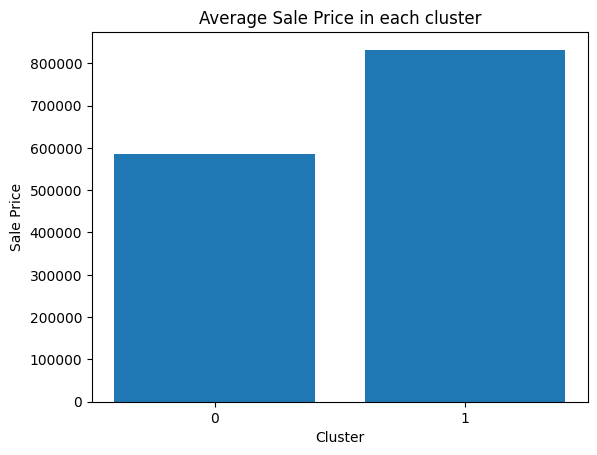

In [283]:
plt.bar(clusters_grouped.index, clusters_grouped['SalePrice'])
plt.title('Average Sale Price in each cluster')
plt.ylabel('Sale Price')
plt.xlabel('Cluster')
plt.xticks(clusters_grouped.index);

Cluster 1 has a much higher average sale price compared to Cluster 0, indicating that homes in Cluster 1 are generally more expensive.

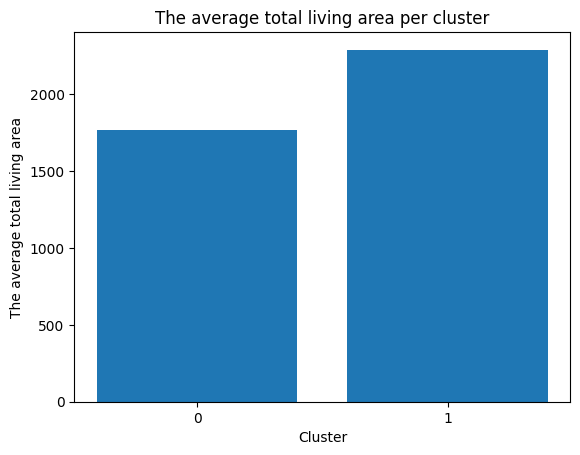

In [284]:
plt.bar(clusters_grouped.index, clusters_grouped['SqFtTotLiving'])
plt.title('The average total living area per cluster')
plt.ylabel('The average total living area')
plt.xlabel('Cluster')
plt.xticks(clusters_grouped.index);

Cluster 1 also has a larger average total living area, suggesting that homes in this cluster are more spacious.

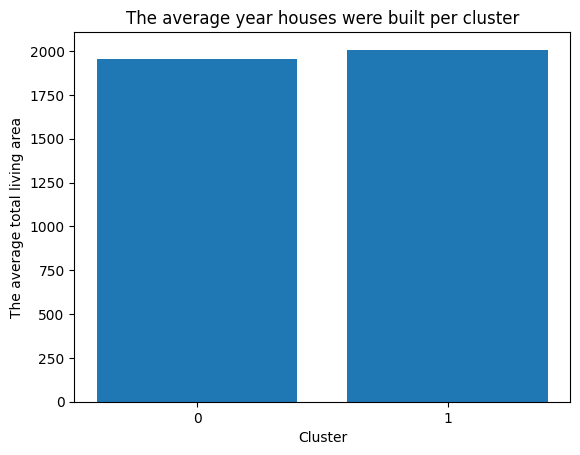

In [285]:
plt.bar(clusters_grouped.index, clusters_grouped['YrBuilt'])
plt.title('The average year houses were built per cluster')
plt.ylabel('The average total living area')
plt.xlabel('Cluster')
plt.xticks(clusters_grouped.index);

Cluster 1 consists of newer homes, with an average year of construction around 2008, while Cluster 0 includes older homes built around 1955.

##Modeling

###Use random_state = 42 for your train_test_split

In [286]:
X = df2.drop(columns=['SalePrice'])
y = df2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Apply PCA to reduce the number of features to a more reasonable number.

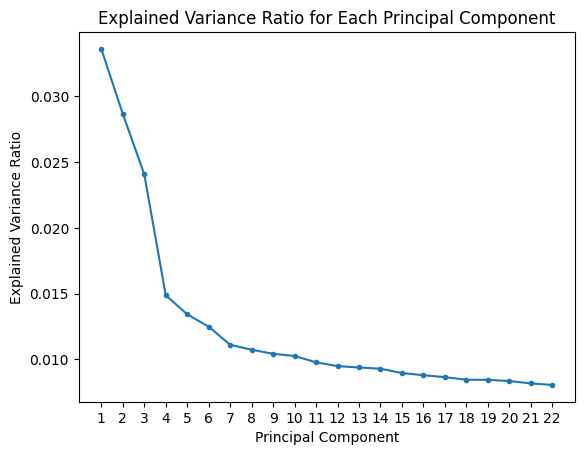

In [287]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with the number of components you want
pca = PCA(n_components=22)
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.plot(range(1, 23), pca.explained_variance_ratio_, marker='.')
plt.xticks(ticks=range(1, 23))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

Based on the above plot I might choose either 4 or 7 components to keep. I will choose 7.

###Apply PCA to reduce the number of features to a more reasonable number.

In [304]:
# Create a PCA (Principal Component Analysis) instance with 7 components
pca7 = PCA(n_components=7)

# Fit and transform the training data 'X_train_scaled' using PCA
X_train_pca = pca7.fit_transform(X_train_scaled)

# Transform the testing data 'X_test_scaled' using the same PCA model
X_test_pca = pca7.transform(X_test_scaled)


##Report the how many fewer columns are present after PCA.

In [289]:
difference = X_train.shape[1] - X_train_pca.shape[1]

print(f'There are {difference} fewer columns after applying PCA')

There are 164 fewer columns after applying PCA


##Report the amount of variance retained after PCA.

In [290]:
variance = pca7.explained_variance_ratio_.sum()
print(f'The pca explains {variance:.2f} percent of the variance of the original data')

The pca explains 0.14 percent of the variance of the original data


## Use a deep learning model to predict the sale price of each house.

1. Create 3 different versions of a sequential model.
  1. Each new model should be an iteration on the previous model.
  2. Justify in writing why you changed what you did for each new model.
  3. For example, why did you add layers, regularization, nodes, etc.
2. Use some form of regularization with at least one model.
3. Evaluate each model with appropriate metrics.

## Basic Model

In [291]:
# Version 1: Basic Model
model_v1 = Sequential()
model_v1.add(Dense(units=64, activation='relu', input_dim=X_train_pca.shape[1]))  # Input layer
model_v1.add(Dense(units=32, activation='relu'))  # Hidden layer
model_v1.add(Dense(units=1, activation='linear'))  # Output layer

# Compile the model
model_v1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on training data
model_v1.fit(X_train_pca, y_train, epochs=50, batch_size=32)

# Evaluate the model on test data
y_pred_v1 = model_v1.predict(X_test_pca)


Epoch 1/50
116/116 [==============================] - 1s 2ms/step - loss: 531700842496.0000
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 531568721920.0000
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 531102629888.0000
Epoch 4/50
116/116 [==============================] - 0s 2ms/step - loss: 530060705792.0000
Epoch 5/50
116/116 [==============================] - 0s 2ms/step - loss: 528210067456.0000
Epoch 6/50
116/116 [==============================] - 0s 2ms/step - loss: 525346013184.0000
Epoch 7/50
116/116 [==============================] - 0s 2ms/step - loss: 521322463232.0000
Epoch 8/50
116/116 [==============================] - 0s 2ms/step - loss: 516010868736.0000
Epoch 9/50
116/116 [==============================] - 0s 2ms/step - loss: 509330522112.0000
Epoch 10/50
116/116 [==============================] - 0s 2ms/step - loss: 501221228544.0000
Epoch 11/50
116/116 [==============================] - 0s 2ms/step - loss: 4916

##Adding Complexity

In [292]:
# Version 2: Adding Complexity
model_v2 = Sequential()
model_v2.add(Dense(units=128, activation='relu', input_dim=X_train_pca.shape[1]))  # Input layer
model_v2.add(Dense(units=64, activation='relu'))  # Hidden layer 1
model_v2.add(Dense(units=64, activation='relu'))  # Hidden layer 2
model_v2.add(Dense(units=32, activation='relu'))  # Hidden layer 3
model_v2.add(Dense(units=1, activation='linear'))  # Output layer

# Compile the model
model_v2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on training data
model_v2.fit(X_train_pca, y_train, epochs=100, batch_size=64)

# Evaluate the model on test data
y_pred_v2 = model_v2.predict(X_test_pca)


Epoch 1/100
58/58 [==============================] - 1s 3ms/step - loss: 531678330880.0000
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 529891164160.0000
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 506379567104.0000
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 387427860480.0000
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 154354876416.0000
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 66808934400.0000
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 60352524288.0000
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 58789527552.0000
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 57986568192.0000
Epoch 10/100
58/58 [==============================] - 0s 4ms/step - loss: 57453780992.0000
Epoch 11/100
58/58 [==============================] - 0s 3ms/step - loss: 56885166080.0000
Epo

##Adding Regularization

In [293]:
# Version 3: Adding Regularization
model_v3 = Sequential()
model_v3.add(Dense(units=128, activation='relu', input_dim=X_train_pca.shape[1], kernel_regularizer=l2(0.01)))  # Input layer with L2 regularization
model_v3.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 1 with L2 regularization
model_v3.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 2 with L2 regularization
model_v3.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 3 with L2 regularization
model_v3.add(Dense(units=1, activation='linear'))  # Output layer

# Compile the model
model_v3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on training data
model_v3.fit(X_train_pca, y_train, epochs=100, batch_size=64)

# Evaluate the model on test data
y_pred_v3 = model_v3.predict(X_test_pca)


Epoch 1/100
58/58 [==============================] - 2s 4ms/step - loss: 531674955776.0000
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 529384439808.0000
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 498459508736.0000
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 345192857600.0000
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 109179994112.0000
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 61377916928.0000
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 59132325888.0000
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 58269646848.0000
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 57574309888.0000
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 57011740672.0000
Epoch 11/100
58/58 [==============================] - 0s 3ms/step - loss: 56539545600.0000
Epo

##Model 1

In [294]:
# Predictions from Model 1
y_pred_v1 = model_v1.predict(X_test_pca)

# Calculate MAE, MSE, RMSE, and R2 for Model 1
mae_v1 = mean_absolute_error(y_test, y_pred_v1)
mse_v1 = mean_squared_error(y_test, y_pred_v1)
rmse_v1 = np.sqrt(mse_v1)
r2_v1 = r2_score(y_test, y_pred_v1)

print(f"Model 1 Metrics:")
print(f"MAE: {mae_v1:.2f}")
print(f"MSE: {mse_v1:.2f}")
print(f"RMSE: {rmse_v1:.2f}")
print(f"R2 Score: {r2_v1:.2f}")


39/39 [==============================] - 0s 2ms/step
Model 1 Metrics:
MAE: 186938.74
MSE: 63591143617.17
RMSE: 252172.84
R2 Score: 0.27


In [295]:
# Create a sequential model
model2 = Sequential()

# Add an input layer
model2.add(Dense(units=128, activation='relu', input_dim=input_dim))

# Add a hidden layer with more units
model2.add(Dense(units=64, activation='relu'))

# Add an output layer (no activation for regression)
model2.add(Dense(units=1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])


##Model 2

In [296]:
# Predictions from Model 2
y_pred_v2 = model_v2.predict(X_test_pca)

# Calculate MAE, MSE, RMSE, and R2 for Model 2
mae_v2 = mean_absolute_error(y_test, y_pred_v2)
mse_v2 = mean_squared_error(y_test, y_pred_v2)
rmse_v2 = np.sqrt(mse_v2)
r2_v2 = r2_score(y_test, y_pred_v2)

print(f"Model 2 Metrics:")
print(f"MAE: {mae_v2:.2f}")
print(f"MSE: {mse_v2:.2f}")
print(f"RMSE: {rmse_v2:.2f}")
print(f"R2 Score: {r2_v2:.2f}")


39/39 [==============================] - 0s 2ms/step
Model 2 Metrics:
MAE: 156207.89
MSE: 47270028327.59
RMSE: 217416.72
R2 Score: 0.46


## Model 3

In [297]:
# Create a sequential model
model3 = Sequential()

# Add an input layer
model3.add(Dense(units=128, activation='relu', input_dim=input_dim))

# Add a hidden layer with regularization
model3.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))

# Add an output layer (no activation for regression)
model3.add(Dense(units=1))

# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])


In [298]:
# Predictions from Model 3
y_pred_v3 = model_v3.predict(X_test_pca)

# Calculate MAE, MSE, RMSE, and R2 for Model 3
mae_v3 = mean_absolute_error(y_test, y_pred_v3)
mse_v3 = mean_squared_error(y_test, y_pred_v3)
rmse_v3 = np.sqrt(mse_v3)
r2_v3 = r2_score(y_test, y_pred_v3)

print(f"Model 3 Metrics:")
print(f"MAE: {mae_v3:.2f}")
print(f"MSE: {mse_v3:.2f}")
print(f"RMSE: {rmse_v3:.2f}")
print(f"R2 Score: {r2_v3:.2f}")


39/39 [==============================] - 0s 1ms/step
Model 3 Metrics:
MAE: 155456.96
MSE: 47187855985.85
RMSE: 217227.66
R2 Score: 0.46


##Final Model

Model 3 appears to be the best choice

Lower MAE: Model 3 has the lowest Mean Absolute Error (MAE) among all three models. This indicates that, on average, the predictions made by Model 3 have the smallest absolute difference from the actual sale prices.

Lower MSE and RMSE: Model 3 also has lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) compared to both Model 1 and Model 2. These metrics measure the average squared difference and the square root of the squared difference between predictions and actual values, respectively. Lower MSE and RMSE indicate that Model 3's predictions are closer to the actual values in terms of magnitude.

Higher R-squared (R2) Score: Model 3 has the highest R2 score among all three models. R2 score measures the proportion of the variance in the dependent variable (sale prices) that is predictable from the independent variables (features). A higher R2 score indicates that Model 3 explains a greater portion of the variance in sale prices, which implies better model fit.

Model 3 provides a reasonable starting point for predicting house sale prices, but it may not fully address the business problem. Further improvements in prediction accuracy are desirable, especially in the real estate industry where precise pricing is crucial.

# Sources

KMeans - Find K - https://colab.research.google.com/drive/1TX5WLd2uNzl4P88Ie_FsOixCtMIB1DMl#scrollTo=BgAikfncOkgE

Week 11 slides: https://docs.google.com/presentation/d/1eqR2lkm1A-IzK-fphQY7QSYlEq8goBgV/edit#slide=id.p22

Week 14 slides: https://docs.google.com/presentation/d/1sZAynf9--MRtUAIdGIDTFp9Lw3wAnzpw/edit?rtpof=true&sd=true

 Mock Practice Belt Exam: https://colab.research.google.com/drive/18v5DW0kJdVTqsofKnh1bh_Dm69ZcuSin

SOLUTIONS Challenge_ Tuning Neural Networks.ipynb: https://colab.research.google.com/drive/1WFnQTTsOoPpbiH46lxjRC0qnAmNLRFh5#scrollTo=GOe9CMP2PtDT